## Problem Statement - Part I

This assignment contains two parts. 

1. Part-I is a programming assignment (to be submitted in a Jupyter Notebook), and 

2. Part-II includes subjective questions (to be submitted in a PDF file). 

 
Part-II is given on the next page.

## Assignment Part-I

A US-based housing company named Surprise Housing has decided to enter the Australian market.

The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

### Expected Outcome:

1. The company is looking at prospective properties to buy to enter the market. 

2. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 
The company wants to know:

3. Which variables are significant in predicting the price of a house, and

4. How well those variables describe the price of a house.

 Also, 
 
5. Determine the optimal value of lambda for ridge and lasso regression.

### Business Goal 

1. You are required to model the price of houses with the available independent variables. 

2. This model will then be used by the management to understand how exactly the prices vary with the variables. 

3. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Problem Statement - Part II

### Assignment Part-II

The following questions are the second part of the graded assignment. Please submit the answers in one PDF file. For writing normal text, please use MS Word (or similar software that can convert documents to PDF). For equations and figures, you can write/draw them on a blank sheet of paper using a pen, click images and upload them in the same Word document.

The final submission will be in the form of one PDF file. A sample PDF to illustrate the submission format is provided below.

Note: DO NOT copy or paste answers from anywhere, and type the answers in your own words; your solution files will be tested using automatic plagiarism checkers and will attract a heavy penalty if plagiarism is detected.

Please limit your answers to less than 500 words per question.
 
### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?
 
### Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

### Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?



## 1. Data Reading & Understanding:

In [1]:
# Import the Necessary Libraries

import numpy as np
import pandas as pd

# Import Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import the Linear Regression/Ridge/lasso model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score

import os

# Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
Housing = pd.read_csv("Downloads//train.csv")

In [3]:
# Check the data head 
Housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
# Check the data type
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
# There are many null values in the data sets.
# Let us see the Shape of the data

Housing.shape


(1460, 81)

In [6]:
# There are 1460 rows and 81 Coloumns in the data sets.
# Let us check the stats of the data
Housing.describe()


Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
# Check the Data types:
Housing.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [8]:
# There are many coloumns are there . let us clean the data..

## 2. Data Cleaning :

In [9]:
# We could see that the min and max values of numeric data in the datasets.
## Missing values percentage 
round(100*(Housing.isnull().sum())/len(Housing), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [10]:
# Considering 10% of the nan values and remaining we will drop it as it is of no use.
round(Housing.isnull().sum()/len(Housing.index),2)[round(Housing.isnull().sum()/
                                                                 len(Housing.index),2).values>0.10]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [11]:
# Let us drop these null values and proceed with the data sets.
Housing = Housing.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis = 1)

In [12]:
## Missing values percentage 
round(100*(Housing.isnull().sum())/len(Housing), 2)[round(100*(Housing.isnull().sum())/len(Housing), 2).values>0]

MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
dtype: float64

In [13]:
# There are lot of null values present in the data sets.5% is ok. so we will immute it 


## 3. Features - EDA:

In [14]:
# Before We proceed further as we see the year built, year removeadd that is did some modification and year sold, we can conver it to to the age as the part of EDA and proceed further.
Housing['YearBuilt_Old'] = Housing.YearBuilt.max()-Housing.YearBuilt
Housing['YearRemodAdd_Old'] = Housing.YearRemodAdd.max()-Housing.YearRemodAdd
Housing['GarageYrBlt_Old'] = Housing.GarageYrBlt.max()-Housing.GarageYrBlt
Housing['YrSold_Old'] = Housing.YrSold.max()-Housing.YrSold
Housing[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(5)


YearBuilt  YearRemodAdd  GarageYrBlt  YrSold  YearBuilt_Old  \
941       1999          1999       1999.0    2009             11   
392       1959          1959       1959.0    2007             51   
697       1952          1952       1952.0    2006             58   
76        1956          1956       1956.0    2008             54   
844       1915          1950       1949.0    2008             95   

     YearRemodAdd_Old  GarageYrBlt_Old  YrSold_Old  
941                11             11.0           1  
392                51             51.0           3  
697                58             58.0           4  
76                 54             54.0           2  
844                60             61.0           2

In [15]:
# Let us drop the coloumns from the orginal data sets
Housing = Housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [16]:
# Check the data head again
Housing.head()

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   1          60       RL     8450   Pave      Reg         Lvl    AllPub   
1   2          20       RL     9600   Pave      Reg         Lvl    AllPub   
2   3          60       RL    11250   Pave      IR1         Lvl    AllPub   
3   4          70       RL     9550   Pave      IR1         Lvl    AllPub   
4   5          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope  ... PoolArea MiscVal MoSold SaleType SaleCondition  \
0    Inside       Gtl  ...        0       0      2       WD        Normal   
1       FR2       Gtl  ...        0       0      5       WD        Normal   
2    Inside       Gtl  ...        0       0      9       WD        Normal   
3    Corner       Gtl  ...        0       0      2       WD       Abnorml   
4       FR2       Gtl  ...        0       0     12       WD        Normal   

   SalePrice  YearBuilt_Old YearRemodAdd_Old GarageYrBlt_Old YrSold_Old  
0     208500              7                7             7.0          2  
1     181500             34               34            34.0          3  
2     223500              9                8             9.0          2  
3     140000             95               40            12.0          4  
4     250000             10               10            10.0          2  

[5 rows x 75 columns]

In [17]:
# Now we can see the year coloumn age has been taken and the original coloumns are deleted.
## Missing values percentage 
round(100*(Housing.isnull().sum())/len(Housing), 2)[round(100*(Housing.isnull().sum())/len(Housing), 2).values>0.00]

MasVnrType         0.55
MasVnrArea         0.55
BsmtQual           2.53
BsmtCond           2.53
BsmtExposure       2.60
BsmtFinType1       2.53
BsmtFinType2       2.60
Electrical         0.07
GarageType         5.55
GarageFinish       5.55
GarageQual         5.55
GarageCond         5.55
GarageYrBlt_Old    5.55
dtype: float64

## 4. Treat the Null:

In [18]:
# Let us check the values and immute the values 
Housing['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [19]:
# As we see around 864 none values are present. let us fill with Na.
Housing.MasVnrType.fillna('None',inplace = True)

In [20]:
# Let us check the values and immute the values 
Housing['MasVnrArea'].value_counts()

0.0       861
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
         ... 
14.0        1
53.0        1
24.0        1
127.0       1
365.0       1
115.0       1
562.0       1
259.0       1
378.0       1
219.0       1
161.0       1
247.0       1
109.0       1
278.0       1
375.0       1
225.0       1
604.0       1
762.0       1
290.0       1
299.0       1
202.0       1
731.0       1
167.0       1
309.0       1
1129.0      1
651.0       1
337.0       1
415.0       1
293.0       1
621.0       1
Name: MasVnrArea, Length: 327, dtype: int64

In [21]:
# There are 861 zeros are there. we can do imute with mean

Housing.MasVnrArea.fillna(Housing.MasVnrArea.mean(),inplace=True)

In [22]:
# Let us check the values and immute the values 
Housing['BsmtQual'].value_counts()


TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [23]:
# Again here TA is higher, immute with TA
Housing.BsmtQual.fillna('TA',inplace=True)

In [24]:
# Let us check the values and immute the values 
Housing['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [25]:
# Again here TA is higher, immute with TA
Housing.BsmtCond.fillna('TA',inplace=True)

In [26]:
# Let us check the values and immute the values 
Housing['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [27]:
# Again here No is higher, immute with No
Housing.BsmtExposure.fillna('No',inplace=True)

In [28]:
# Let us check the values and immute the values 
Housing['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [29]:
# Here immute with unf.

Housing.BsmtFinType1.fillna('Unf',inplace=True)

In [30]:
# Let us check the values and immute the values 
Housing['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [31]:
# Here immute with unf.

Housing.BsmtFinType2.fillna('Unf',inplace=True)

In [32]:
# Let us check the values and immute the values 
Housing['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [33]:
# Here immute with Attchd.

Housing.GarageType.fillna('Attchd',inplace=True)

In [34]:
# Let us check the values and immute the values 
Housing['GarageYrBlt_Old'].value_counts()

5.0      65
4.0      59
6.0      53
7.0      50
3.0      49
33.0     35
12.0     31
11.0     30
2.0      29
34.0     29
10.0     27
8.0      26
42.0     26
60.0     24
17.0     22
44.0     21
45.0     21
1.0      21
48.0     21
52.0     21
53.0     20
14.0     20
40.0     20
9.0      20
32.0     19
50.0     19
13.0     19
56.0     19
36.0     18
16.0     18
         ..
74.0      5
94.0      5
88.0      5
82.0      4
65.0      4
75.0      4
79.0      4
64.0      4
28.0      4
87.0      3
58.0      3
72.0      3
0.0       3
100.0     3
86.0      3
78.0      3
89.0      3
68.0      2
63.0      2
81.0      2
76.0      2
73.0      2
96.0      2
92.0      2
95.0      2
83.0      1
110.0     1
102.0     1
104.0     1
77.0      1
Name: GarageYrBlt_Old, Length: 97, dtype: int64

In [35]:
# let us immute with -1 having no garage
Housing.GarageYrBlt_Old.fillna(-1,inplace=True)

In [36]:
# Let us check the values and immute the values 
Housing['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [37]:
# Here immute with unf.

Housing.GarageFinish.fillna('Unf',inplace=True)

In [38]:
# Let us check the values and immute the values 
Housing['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [39]:
# Here immute with TA.

Housing.GarageQual.fillna('TA',inplace=True)

In [40]:
# Let us check the values and immute the values 
Housing['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [41]:
# Here immute with TA.

Housing.GarageCond.fillna('TA',inplace=True)

In [42]:
# We immuted all the NAN Values. Let us check the percentage of the null values.
## Missing values percentage 
round(100*(Housing.isnull().sum())/len(Housing), 2)[round(100*(Housing.isnull().sum())/len(Housing), 2).values>0.00]

Electrical    0.07
dtype: float64

In [43]:
# Let us check the values and immute the values 
Housing['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [44]:
# Here immute with SBrkr - Standard Circuit Breakers & Romex

Housing.Electrical.fillna('Sbrkr',inplace=True)

In [45]:
## We can see that more other coloumns needs to checked as well might have no null values but having more zeros 
# Let us check the values and immute the values 
Housing['BsmtFinSF2'].value_counts()

0       1293
180        5
374        3
551        2
93         2
468        2
147        2
480        2
539        2
712        2
117        2
279        2
96         2
391        2
287        2
290        2
294        2
64         2
41         2
182        2
469        2
228        1
208        1
210        1
211        1
202        1
215        1
193        1
219        1
184        1
        ... 
354        1
1080       1
1127       1
375        1
377        1
380        1
396        1
400        1
411        1
420        1
435        1
438        1
441        1
465        1
466        1
472        1
479        1
486        1
491        1
492        1
495        1
499        1
500        1
506        1
531        1
532        1
544        1
546        1
547        1
1474       1
Name: BsmtFinSF2, Length: 144, dtype: int64

In [46]:
# There are 1155 zeros are there. we can do imute with mean

Housing.BsmtFinSF2.fillna(Housing.BsmtFinSF2.mean(),inplace=True)

In [47]:
# Check the NAN values finally after immuting.
round(Housing.isnull().sum()/len(Housing.index),2)[round(Housing.isnull().sum()/
                                                                 len(Housing.index),2).values>0.00]

Series([], dtype: float64)

In [48]:
# Check the Null values 

round(Housing.isnull().sum()/len(Housing.index),2)>0.00

Id                  False
MSSubClass          False
MSZoning            False
LotArea             False
Street              False
LotShape            False
LandContour         False
Utilities           False
LotConfig           False
LandSlope           False
Neighborhood        False
Condition1          False
Condition2          False
BldgType            False
HouseStyle          False
OverallQual         False
OverallCond         False
RoofStyle           False
RoofMatl            False
Exterior1st         False
Exterior2nd         False
MasVnrType          False
MasVnrArea          False
ExterQual           False
ExterCond           False
Foundation          False
BsmtQual            False
BsmtCond            False
BsmtExposure        False
BsmtFinType1        False
                    ...  
FullBath            False
HalfBath            False
BedroomAbvGr        False
KitchenAbvGr        False
KitchenQual         False
TotRmsAbvGrd        False
Functional          False
Fireplaces  

In [49]:
# As we clearly see there is no null values across the data sets.

In [50]:
# As we see the ID is not needed let us drop the ID and see the correlations and proceed for the outlier analysis and treatment.

Housing = Housing.drop(['Id'],axis =1)
Housing.head()


MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0          60       RL     8450   Pave      Reg         Lvl    AllPub   
1          20       RL     9600   Pave      Reg         Lvl    AllPub   
2          60       RL    11250   Pave      IR1         Lvl    AllPub   
3          70       RL     9550   Pave      IR1         Lvl    AllPub   
4          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... PoolArea MiscVal MoSold SaleType  \
0    Inside       Gtl      CollgCr  ...        0       0      2       WD   
1       FR2       Gtl      Veenker  ...        0       0      5       WD   
2    Inside       Gtl      CollgCr  ...        0       0      9       WD   
3    Corner       Gtl      Crawfor  ...        0       0      2       WD   
4       FR2       Gtl      NoRidge  ...        0       0     12       WD   

   SaleCondition  SalePrice YearBuilt_Old YearRemodAdd_Old GarageYrBlt_Old  \
0         Normal     208500             7                7             7.0   
1         Normal     181500            34               34            34.0   
2         Normal     223500             9                8             9.0   
3        Abnorml     140000            95               40            12.0   
4         Normal     250000            10               10            10.0   

  YrSold_Old  
0          2  
1          3  
2          2  
3          4  
4          2  

[5 rows x 74 columns]

## 5. Outlier Analysis:

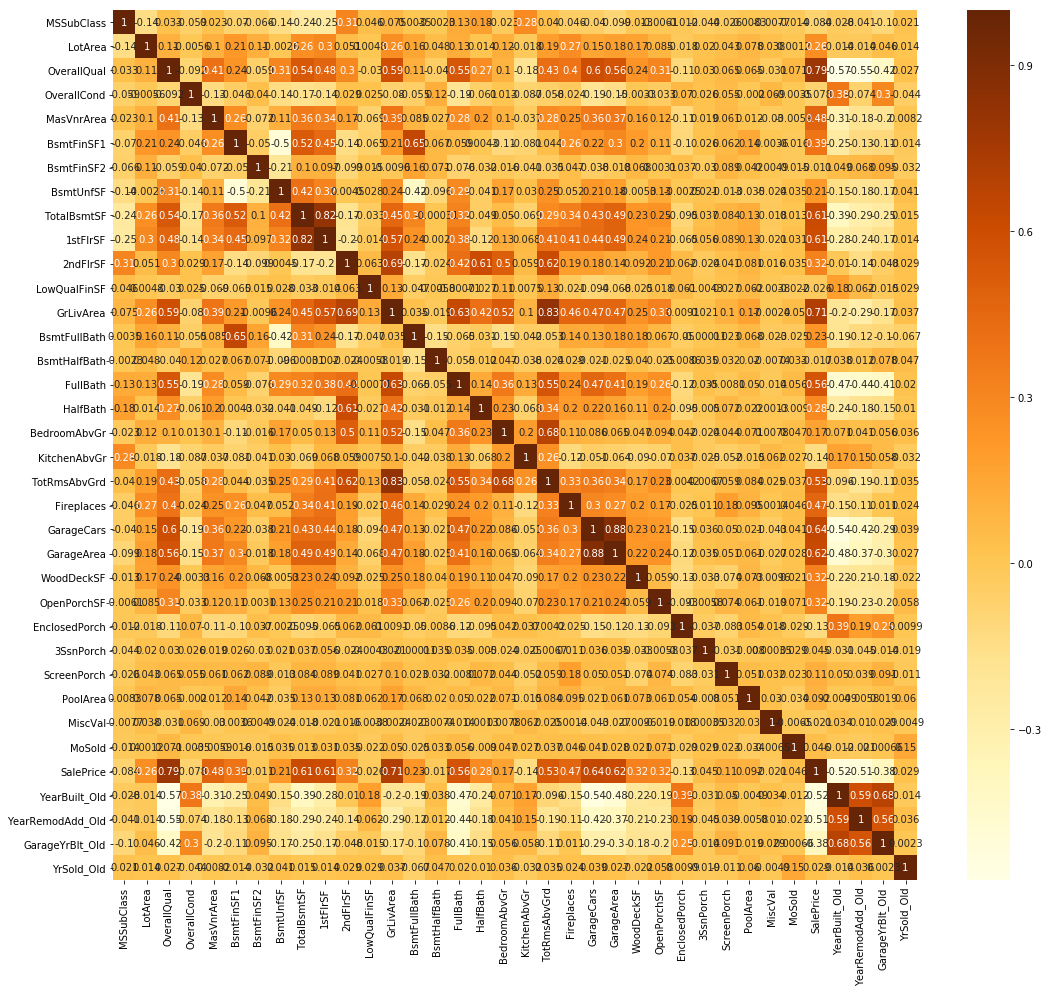

In [51]:
# Before proceeding to the oulier analysis. as the numercial variables are linearly dependent on the other numeric variables. 
# Let us see in the heatmap.
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(18,16))

# heatmap
sns.heatmap(Housing.corr(), cmap='YlOrBr', annot=True)
plt.show()

### Inferences:
- Sales Price is highly correlated positively with OverallQual: Rates the overall material and finish of the house 0.79% and 0.7% postive correlation with GrLivArea: Above grade (ground) living area square feet
- Sales Price is also highly correlated of 0.61% - TotalBsmtSF: Total square feet of basement area & 1stFlrSF: First Floor square feet
- Also, we can see that Sales Price positive correlated with WoodDecksf and GarageArea with 0.64% and 0.62%.
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) and FullBath: Full bathrooms above grade having positive impact on sales price.
- Also, Sales price also having impact on the YearBuilt: Original construction date and YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)0.52% and 0.51%.




Text(0, 0.5, 'SalePrice')

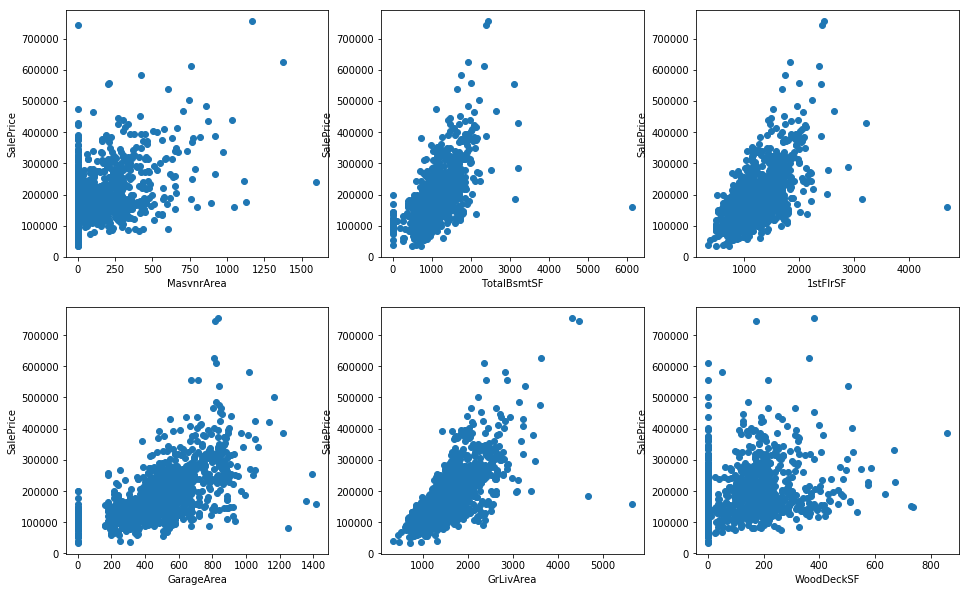

In [52]:
# Let us see clearly in the Scatter plots as well . 
plt.figure(figsize=(16,10))

plt.subplot(2,3,1)
plt.scatter(Housing.MasVnrArea,Housing.SalePrice)
plt.xlabel('MasvnrArea')
plt.ylabel('SalePrice')

plt.subplot(2,3,2)
plt.scatter(Housing.TotalBsmtSF,Housing.SalePrice)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

plt.subplot(2,3,3)
plt.scatter(Housing['1stFlrSF'],Housing.SalePrice)
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')

plt.subplot(2,3,4)
plt.scatter(Housing['GarageArea'],Housing.SalePrice)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')

plt.subplot(2,3,5)
plt.scatter(Housing['GrLivArea'],Housing.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

plt.subplot(2,3,6)
plt.scatter(Housing['WoodDeckSF'],Housing.SalePrice)
plt.xlabel('WoodDeckSF')
plt.ylabel('SalePrice')

### Inferences:

- It is very clear that the sales price having highly correlated with the above variables.

In [53]:
# Let us see the ouliers and treat it by removing the ouliers in the datasets.
#REMOVE OUTLIERS
def remove_outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.95)
    value = q3 - q1
    lower_value = q1-1.5*value
    higher_value = q3 + 1.5*value
    out = df[(df[col]<higher_value) & (df[col]>lower_value)]
    return out

In [54]:
#visualizing spread of variable
def showBoxPlot(data,col):
    plt.figure(figsize=(6,4))
    sns.boxplot(y=data[col])
    plt.show()
    print(data[col].describe(percentiles=[0.05,.25, .5, .75, .90, .95]))

In [55]:
# all numeric (float and int) variables in the dataset
Housing_numeric = Housing.select_dtypes(include=['float64', 'int64'])
Housing_numeric.head()

MSSubClass  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0          60     8450            7            5       196.0         706   
1          20     9600            6            8         0.0         978   
2          60    11250            7            5       162.0         486   
3          70     9550            7            5         0.0         216   
4          60    14260            8            5       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  3SsnPorch  ScreenPorch  \
0           0        150          856       856  ...          0            0   
1           0        284         1262      1262  ...          0            0   
2           0        434          920       920  ...          0            0   
3           0        540          756       961  ...          0            0   
4           0        490         1145      1145  ...          0            0   

   PoolArea  MiscVal  MoSold  SalePrice  YearBuilt_Old  YearRemodAdd_Old  \
0         0        0       2     208500              7                 7   
1         0        0       5     181500             34                34   
2         0        0       9     223500              9                 8   
3         0        0       2     140000             95                40   
4         0        0      12     250000             10                10   

   GarageYrBlt_Old  YrSold_Old  
0              7.0           2  
1             34.0           3  
2              9.0           2  
3             12.0           4  
4             10.0           2  

[5 rows x 36 columns]

In [56]:
Housing_numeric.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'YearBuilt_Old', 'YearRemodAdd_Old',
       'GarageYrBlt_Old', 'YrSold_Old'],
      dtype='object')

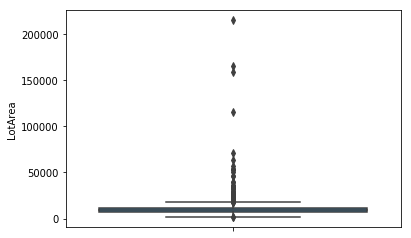

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
5%         3311.700000
25%        7553.500000
50%        9478.500000
75%       11601.500000
90%       14381.700000
95%       17401.150000
max      215245.000000
Name: LotArea, dtype: float64


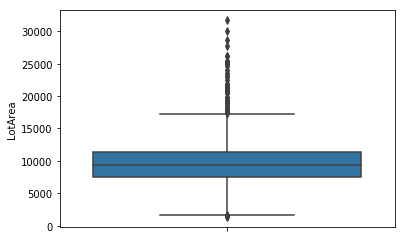

count     1439.000000
mean      9673.382210
std       3932.737746
min       1300.000000
5%        3230.000000
25%       7500.000000
50%       9400.000000
75%      11431.500000
90%      14063.200000
95%      16288.600000
max      31770.000000
Name: LotArea, dtype: float64


In [57]:
# Let us see the Ouliers for Sales price.

showBoxPlot(Housing,'LotArea')


# As per above box plots we can see outlier are presents for LotArea so let's do outlier treatments

Housing = remove_outliers(Housing,'LotArea')
showBoxPlot(Housing,'LotArea')



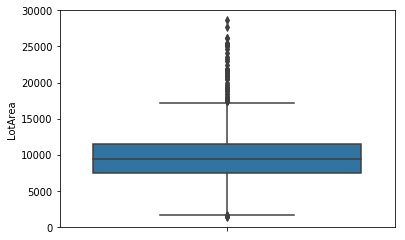

count     1437.000000
mean      9643.888657
std       3854.934257
min       1300.000000
5%        3230.000000
25%       7500.000000
50%       9400.000000
75%      11426.000000
90%      14002.400000
95%      16232.600000
max      28698.000000
Name: LotArea, dtype: float64


In [58]:
# As per above box plots we can see outlier are presents for LotArea so let's do outlier treatments
Housing = remove_outliers(Housing,'LotArea')
showBoxPlot(Housing,'LotArea')

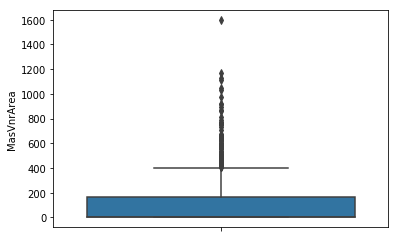

count    1437.000000
mean      101.098676
std       175.036187
min         0.000000
5%          0.000000
25%         0.000000
50%         0.000000
75%       162.000000
90%       320.000000
95%       442.200000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [59]:
# Let us see the next variable to check the Ouliers 
showBoxPlot(Housing,'MasVnrArea')


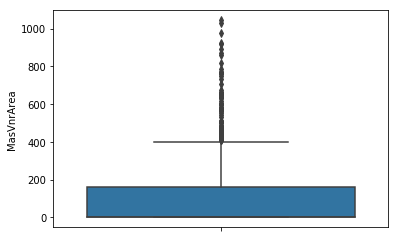

count    1433.000000
mean       97.881924
std       163.982876
min         0.000000
5%          0.000000
25%         0.000000
50%         0.000000
75%       160.000000
90%       319.600000
95%       435.400000
max      1047.000000
Name: MasVnrArea, dtype: float64


In [60]:
# As per above box plots we can see outlier are presents for LotArea so let's do outlier treatments
Housing = remove_outliers(Housing,'MasVnrArea')
showBoxPlot(Housing,'MasVnrArea')

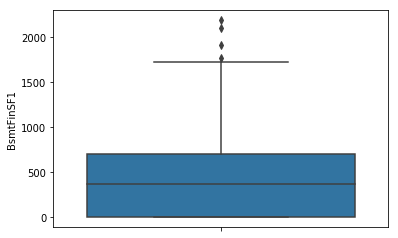

count    1433.000000
mean      429.210049
std       426.115665
min         0.000000
5%          0.000000
25%         0.000000
50%       375.000000
75%       699.000000
90%      1038.400000
95%      1247.800000
max      2188.000000
Name: BsmtFinSF1, dtype: float64


In [61]:
# Let us see the next variable to check the Ouliers 
showBoxPlot(Housing,'BsmtFinSF1')

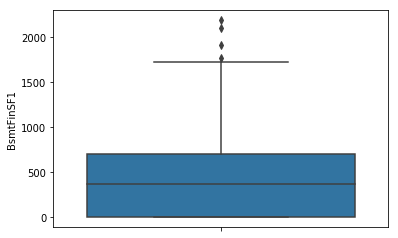

count    1433.000000
mean      429.210049
std       426.115665
min         0.000000
5%          0.000000
25%         0.000000
50%       375.000000
75%       699.000000
90%      1038.400000
95%      1247.800000
max      2188.000000
Name: BsmtFinSF1, dtype: float64


In [62]:
# As per above box plots we can see outlier are presents for BsmtFinSf1- Type 1 finished square feet.  so let's do outlier treatments
Housing = remove_outliers(Housing,'BsmtFinSF1')
showBoxPlot(Housing,'BsmtFinSF1')

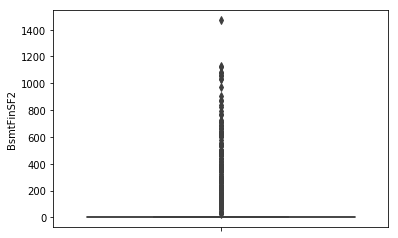

count    1433.000000
mean       45.651082
std       158.946711
min         0.000000
5%          0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%       109.600000
95%       393.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


In [63]:
# Let us see the next variable to check the Ouliers 
showBoxPlot(Housing,'BsmtFinSF2')

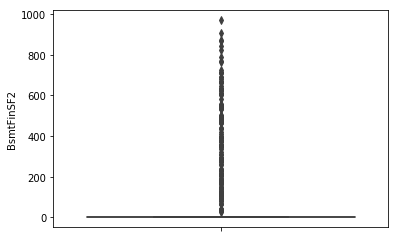

count    1424.000000
mean       38.872191
std       134.146265
min         0.000000
5%          0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%        80.700000
95%       360.800000
max       972.000000
Name: BsmtFinSF2, dtype: float64


In [64]:
# As per above box plots we can see outlier are presents for BsmtFinSf1- Type 2 finished square feet.  so let's do outlier treatments
Housing = remove_outliers(Housing,'BsmtFinSF2')
showBoxPlot(Housing,'BsmtFinSF2')

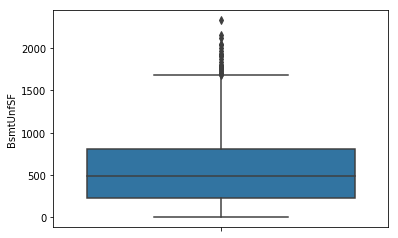

count    1424.000000
mean      573.029494
std       443.183320
min         0.000000
5%          0.000000
25%       228.500000
50%       485.000000
75%       811.000000
90%      1236.100000
95%      1469.700000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


In [65]:
# Let us see the next variable to check the Ouliers 
showBoxPlot(Housing,'BsmtUnfSF')

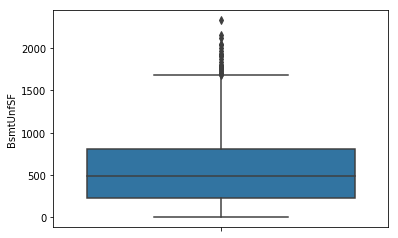

count    1424.000000
mean      573.029494
std       443.183320
min         0.000000
5%          0.000000
25%       228.500000
50%       485.000000
75%       811.000000
90%      1236.100000
95%      1469.700000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


In [66]:
# As per above box plots we can see outlier are presents for BsmtUnfsF- Unfinished square feet of basement area.  so let's do outlier treatments
Housing = remove_outliers(Housing,'BsmtUnfSF')
showBoxPlot(Housing,'BsmtUnfSF')

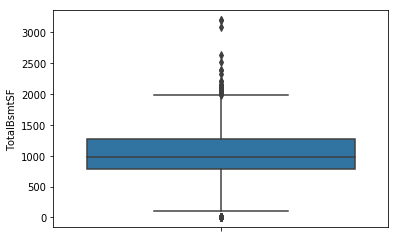

count    1424.000000
mean     1042.061096
std       409.625698
min         0.000000
5%        504.300000
25%       793.000000
50%       981.500000
75%      1271.250000
90%      1580.700000
95%      1731.400000
max      3206.000000
Name: TotalBsmtSF, dtype: float64


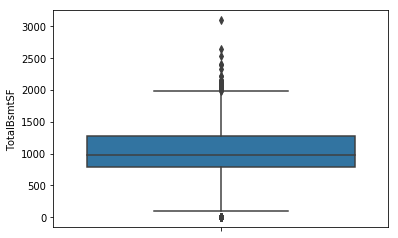

count    1422.000000
mean     1039.021800
std       401.805631
min         0.000000
5%        504.100000
25%       793.000000
50%       980.500000
75%      1268.750000
90%      1579.500000
95%      1728.000000
max      3094.000000
Name: TotalBsmtSF, dtype: float64


In [67]:
# Let us see the next variable to check the Ouliers 
showBoxPlot(Housing,'TotalBsmtSF')
# As per above box plots we can see outlier are presents for TotalBsmtSF- Total square feet of basement area.  so let's do outlier treatments
Housing = remove_outliers(Housing,'TotalBsmtSF')
showBoxPlot(Housing,'TotalBsmtSF')

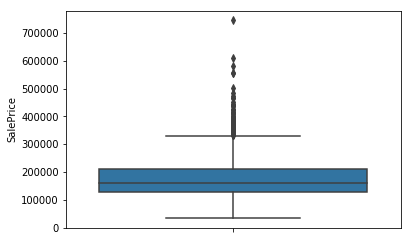

count      1422.000000
mean     178427.248242
std       76118.612881
min       34900.000000
5%        88000.000000
25%      129000.000000
50%      160100.000000
75%      210000.000000
90%      275000.000000
95%      325000.000000
max      745000.000000
Name: SalePrice, dtype: float64


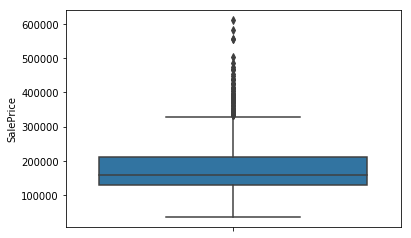

count      1421.000000
mean     178028.534131
std       74645.192867
min       34900.000000
5%        88000.000000
25%      129000.000000
50%      160000.000000
75%      210000.000000
90%      275000.000000
95%      325000.000000
max      611657.000000
Name: SalePrice, dtype: float64


In [68]:
# Let us see the next variable to check the Ouliers 
showBoxPlot(Housing,'SalePrice')
# As per above box plots we can see outlier are presents for TotalBsmtSF- Total square feet of basement area.  so let's do outlier treatments
Housing = remove_outliers(Housing,'SalePrice')
showBoxPlot(Housing,'SalePrice')

In [69]:
# Check the Shape of Housing
Housing.shape

(1421, 74)

In [70]:
# As we see lot more variable are there to remove the outliers.. Let us make a small loop and do remove the outliers rather than doing one by one.

nu_col = ['1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold']
def drop_outliers(x):
    list = []
    for col in nu_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.95)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

Housing = drop_outliers(Housing)

In [71]:
# Check the shape of the data now.
Housing.shape

(1257, 74)

In [72]:
Housing.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0          60       RL     8450   Pave      Reg         Lvl    AllPub   
1          20       RL     9600   Pave      Reg         Lvl    AllPub   
2          60       RL    11250   Pave      IR1         Lvl    AllPub   
3          70       RL     9550   Pave      IR1         Lvl    AllPub   
4          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... PoolArea MiscVal MoSold SaleType  \
0    Inside       Gtl      CollgCr  ...        0       0      2       WD   
1       FR2       Gtl      Veenker  ...        0       0      5       WD   
2    Inside       Gtl      CollgCr  ...        0       0      9       WD   
3    Corner       Gtl      Crawfor  ...        0       0      2       WD   
4       FR2       Gtl      NoRidge  ...        0       0     12       WD   

   SaleCondition  SalePrice YearBuilt_Old YearRemodAdd_Old GarageYrBlt_Old  \
0         Normal     208500             7                7             7.0   
1         Normal     181500            34               34            34.0   
2         Normal     223500             9                8             9.0   
3        Abnorml     140000            95               40            12.0   
4         Normal     250000            10               10            10.0   

  YrSold_Old  
0          2  
1          3  
2          2  
3          4  
4          2  

[5 rows x 74 columns]

## 6. Dummies Creation

In [73]:
## We need to create the dummies, before that we can see any orderly data present in the data and proceed further...
## We can clearly see that the data shape has reduced with the no. of rows due to removal of ouliers. Let us proceed with the 
## Categorical Variables now. 
# all numeric (float and int) variables in the dataset
Housing_cat = Housing.select_dtypes(include=['object'])
Housing_cat.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... Electrical KitchenQual Functional  \
0      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
1      Veenker      Feedr       Norm  ...      SBrkr          TA        Typ   
2      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
3      Crawfor       Norm       Norm  ...      SBrkr          Gd        Typ   
4      NoRidge       Norm       Norm  ...      SBrkr          Gd        Typ   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 38 columns]

In [74]:
# Let us see the Coloumns each is there any orderly sequence is present. 
Housing_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [75]:
# Check the counts and the coloumns. 
Housing_cat['LandSlope'].value_counts()

Gtl    1200
Mod      51
Sev       6
Name: LandSlope, dtype: int64

There are some order is present which has been given in the description as well..Checked via the above value counts. description and make some dummies...and remaining we will 

### LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
            
   
### LandSlope

Gtl - Gentle Slope, 
Mod - Moderate Slope & 
Sev - Severe Slope

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
       
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement 
       
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
       
KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
       
GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
       


In [76]:
# The above variables are in some order. so convert to numerical values as below..and rest we will create dummies.
Housing['LotShape'] = Housing.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
Housing['LandSlope'] = Housing_cat.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
Housing['ExterQual'] = Housing_cat.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
Housing['ExterCond'] = Housing.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
Housing['BsmtQual'] = Housing.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
Housing['BsmtCond'] = Housing.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
Housing['BsmtExposure'] = Housing.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
Housing['BsmtFinType1'] = Housing.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
Housing['BsmtFinType2'] = Housing.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
Housing['HeatingQC'] = Housing.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
Housing['CentralAir'] = Housing.CentralAir.map({'N':0,'Y':1})
Housing['KitchenQual'] = Housing.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
Housing['GarageFinish'] = Housing.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
Housing['GarageQual'] = Housing.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
Housing['GarageCond'] = Housing.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [77]:
# Check the data head again. As we see all got converted
Housing.head()

MSSubClass MSZoning  LotArea Street  LotShape LandContour Utilities  \
0          60       RL     8450   Pave         3         Lvl    AllPub   
1          20       RL     9600   Pave         3         Lvl    AllPub   
2          60       RL    11250   Pave         0         Lvl    AllPub   
3          70       RL     9550   Pave         0         Lvl    AllPub   
4          60       RL    14260   Pave         0         Lvl    AllPub   

  LotConfig  LandSlope Neighborhood  ... PoolArea MiscVal MoSold SaleType  \
0    Inside          0      CollgCr  ...        0       0      2       WD   
1       FR2          0      Veenker  ...        0       0      5       WD   
2    Inside          0      CollgCr  ...        0       0      9       WD   
3    Corner          0      Crawfor  ...        0       0      2       WD   
4       FR2          0      NoRidge  ...        0       0     12       WD   

   SaleCondition  SalePrice YearBuilt_Old YearRemodAdd_Old GarageYrBlt_Old  \
0         Normal     208500             7                7             7.0   
1         Normal     181500            34               34            34.0   
2         Normal     223500             9                8             9.0   
3        Abnorml     140000            95               40            12.0   
4         Normal     250000            10               10            10.0   

  YrSold_Old  
0          2  
1          3  
2          2  
3          4  
4          2  

[5 rows x 74 columns]

In [78]:
# let us create the Dummies for other variables now and merge together with the orginial data sets. 
#Dummy Variable Creation for categorical variables above

# Creating a dummy variable for the variable 'MSZoning'
cont = pd.get_dummies(Housing['MSZoning'],prefix='MSZoning',drop_first=True)
#Adding the results to the master dataframe
Housing = pd.concat([Housing,cont],axis=1)

# Creating a dummy variable for the variable 'Street'
cont = pd.get_dummies(Housing['Street'],prefix='Street',drop_first=True)
#Adding the results to the master dataframe
Housing = pd.concat([Housing,cont],axis=1)

# Creating a dummy variable for the variable 'LandContour'
cont = pd.get_dummies(Housing['LandContour'],prefix='LandContour',drop_first=True)
#Adding the results to the master dataframe
Housing = pd.concat([Housing,cont],axis=1)

# Creating a dummy variable for the variable 'Utilities'
cont = pd.get_dummies(Housing['Utilities'],prefix='Utilities',drop_first=True)
#Adding the results to the master dataframe
Housing = pd.concat([Housing,cont],axis=1)

# Creating a dummy variable for the variable 'Lotconfig'
cont = pd.get_dummies(Housing['LotConfig'],prefix='LotConfig',drop_first=True)
#Adding the results to the master dataframe
Housing = pd.concat([Housing,cont],axis=1)

# Creating a dummy variable for the variable 'Neighborhood'
cont = pd.get_dummies(Housing['Neighborhood'],prefix='Neighborhood',drop_first=True)
#Adding the results to the master dataframe
Housing = pd.concat([Housing,cont],axis=1)

# Creating a dummy variable for the variable 'Condition2'
cont = pd.get_dummies(Housing['Condition1'],prefix='Condition1',drop_first=True)
#Adding the results to the master dataframe
Housing = pd.concat([Housing,cont],axis=1)

# Creating a dummy variable for the variable 'Condition2'
cont = pd.get_dummies(Housing['Condition2'],prefix='Condition2',drop_first=True)
#Adding the results to the master dataframe
Housing = pd.concat([Housing,cont],axis=1)

# Creating a dummy variable for the variable 'BldgType'
cont = pd.get_dummies(Housing['BldgType'],prefix='BldgType',drop_first=True)
#Adding the results to the master dataframe
Housing = pd.concat([Housing,cont],axis=1)

# Creating a dummy variable for the variable 'HouseStyle'
cont = pd.get_dummies(Housing['HouseStyle'],prefix='HouseStyle',drop_first=True)
#Adding the results to the master dataframe
Housing = pd.concat([Housing,cont],axis=1)

# Creating a dummy variable for the variable 'RoofStyle'
cont = pd.get_dummies(Housing['RoofStyle'],prefix='RoofStyle',drop_first=True)
#Adding the results to the master dataframe
Housing = pd.concat([Housing,cont],axis=1)

# Creating a dummy variable for the variable 'RoofMatl'
cont = pd.get_dummies(Housing['RoofMatl'],prefix='RoofMatl',drop_first=True)
#Adding the results to the master dataframe
Housing = pd.concat([Housing,cont],axis=1)

# Creating a dummy variable for the variable 'Exterior1st'
cont = pd.get_dummies(Housing['Exterior1st'],prefix='Exterior1st',drop_first=True)
#Adding the results to the master dataframe
Housing = pd.concat([Housing,cont],axis=1)

# Creating a dummy variable for the variable 'Exterior2nd'
cont = pd.get_dummies(Housing['Exterior2nd'],prefix='Exterior2nd',drop_first=True)
#Adding the results to the master dataframe
Housing = pd.concat([Housing,cont],axis=1)

# Creating a dummy variable for the variable 'MasVnrType'
cont = pd.get_dummies(Housing['MasVnrType'],prefix='MasVnrType',drop_first=True)
#Adding the results to the master dataframe
Housing = pd.concat([Housing,cont],axis=1)

# Creating a dummy variable for the variable 'Foundation'
cont = pd.get_dummies(Housing['Foundation'],prefix='Foundation',drop_first=True)
#Adding the results to the master dataframe
Housing = pd.concat([Housing,cont],axis=1)

# Creating a dummy variable for the variable 'Heating'
cont = pd.get_dummies(Housing['Heating'],prefix='Heating',drop_first=True)
#Adding the results to the master dataframe
Housing = pd.concat([Housing,cont],axis=1)

# Creating a dummy variable for the variable 'HeatingQC'
cont = pd.get_dummies(Housing['HeatingQC'],prefix='HeatingQC',drop_first=True)
#Adding the results to the master dataframe
Housing = pd.concat([Housing,cont],axis=1)


# Creating a dummy variable for the variable 'Electrical'
cont = pd.get_dummies(Housing['Electrical'],prefix='Electrical',drop_first=True)
#Adding the results to the master dataframe
Housing = pd.concat([Housing,cont],axis=1)

# Creating a dummy variable for the variable 'Functional'
cont = pd.get_dummies(Housing['Functional'],prefix='Functional',drop_first=True)
#Adding the results to the master dataframe
Housing = pd.concat([Housing,cont],axis=1)

# Creating a dummy variable for the variable 'GarageType'
cont = pd.get_dummies(Housing['GarageType'],prefix='GarageType',drop_first=True)
#Adding the results to the master dataframe
Housing = pd.concat([Housing,cont],axis=1)

# Creating a dummy variable for the variable 'PavedDrive'
cont = pd.get_dummies(Housing['PavedDrive'],prefix='PavedDrive',drop_first=True)
#Adding the results to the master dataframe
Housing = pd.concat([Housing,cont],axis=1)

# Creating a dummy variable for the variable 'SaleType'
cont = pd.get_dummies(Housing['SaleType'],prefix='SaleType',drop_first=True)
#Adding the results to the master dataframe
Housing = pd.concat([Housing,cont],axis=1)

# Creating a dummy variable for the variable 'SaleCondition'
cont = pd.get_dummies(Housing['SaleCondition'],prefix='SaleCondition',drop_first=True)
#Adding the results to the master dataframe
Housing = pd.concat([Housing,cont],axis=1)


In [79]:
# As we have created dummies of the these varaibles. Let us drop it from the original data sets.

#created dummies for the below variables, so drop the same
Housing = Housing.drop(['MSZoning', 'Street', 'LandContour','Utilities', 'LotConfig',
       'Neighborhood','Condition1','Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
        'Foundation','Heating', 'HeatingQC','Electrical',  'Functional', 'GarageType', 
        'PavedDrive', 'SaleType', 'SaleCondition'],axis = 1)

In [80]:
# Let us check the data set again
Housing.sample(5)

MSSubClass  LotArea  LotShape  LandSlope  OverallQual  OverallCond  \
73            20    10200         3          0            5            7   
1219         160     1680         3          0            6            5   
1128          60    11796         0          0            7            5   
1455          60     7917         3          0            6            5   
1014          20    11664         3          0            6            5   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  SaleType_ConLI  \
73         104.0          2          2         3  ...               0   
1219       236.0          2          2         3  ...               0   
1128         0.0          3          2         4  ...               0   
1455         0.0          2          2         4  ...               0   
1014       206.0          2          2         3  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
73                 0             0             0            1   
1219               0             0             0            1   
1128               0             0             0            1   
1455               0             0             0            1   
1014               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
73                        0                     0                     0   
1219                      0                     0                     0   
1128                      0                     0                     0   
1455                      0                     0                     0   
1014                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
73                       1                      0  
1219                     0                      0  
1128                     1                      0  
1455                     1                      0  
1014                     1                      0  

[5 rows x 192 columns]

In [81]:
# Housing Shape
Housing.shape

(1257, 192)

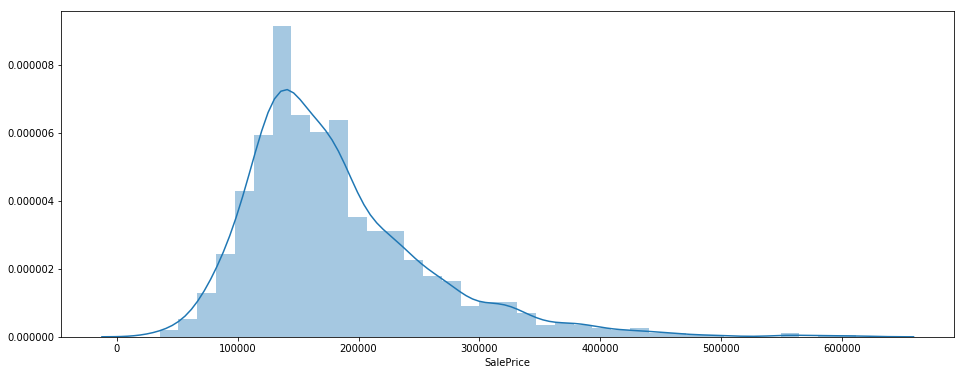

In [82]:
# We have around 192 columns are there and 1257 rows. Let us proceed further for the Model Creation. 
# Check the target varaible distribution before scaling of the data Sale Price

plt.figure(figsize=(16,6))
sns.distplot(Housing.SalePrice)
plt.show()


## Model Building

### 7. Test Train Split:

In [83]:
# Let us split the test and train data first. 

df_train,df_test = train_test_split(Housing,train_size=0.7,test_size=0.3,random_state=42)

In [84]:
# Let us do the scaling to all the dependent variables. 
numeric_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

# Scaling the numeric data.

scaler = StandardScaler()
df_train[numeric_col] = scaler.fit_transform(df_train[numeric_col])
df_test[numeric_col] = scaler.transform(df_test[numeric_col])


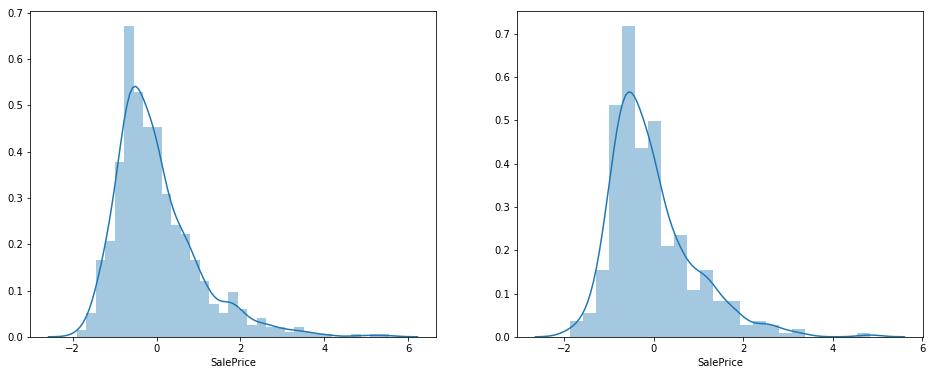

In [85]:
# Check the distribution of the sale price once again after scaling to check the normality
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [86]:
# The Sale Price is normal. Let us proceed to seperate the dependent and independent variables first.
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test


In [87]:
# Will use the RFE - Recurssive Feature elimination to get the optimal variables first and proceed with the Ride and Lasso regression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
# Apply the Linear Regression
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=70, step=1, verbose=0)

In [88]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [89]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [90]:
# Let us split the RFE for Test and Train Sets
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

## 8. Ridge Regression Model:

In [91]:
# Let us see in the Ridge regresion first and check the r2 value.
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9194976783959212
0.8649291714381266


In [92]:
# K fold Gridsearch and taken 5 fold . 
folds  = KFold(n_splits=5,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0, 10.0, 20.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [93]:
# check the result and see the test scores of different alpha values. 
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.002987      0.001164         0.000978        0.000166        0.001   
1       0.002318      0.000499         0.000901        0.000156        0.010   
2       0.002037      0.000069         0.000829        0.000101        0.100   
3       0.002202      0.000261         0.000806        0.000047        0.200   
4       0.002213      0.000401         0.000822        0.000054        0.500   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}           0.912687           0.903129           0.869422   
1   {'alpha': 0.01}           0.912858           0.903253           0.869503   
2    {'alpha': 0.1}           0.914266           0.903813           0.870027   
3    {'alpha': 0.2}           0.915370           0.903889           0.870340   
4    {'alpha': 0.5}           0.917248           0.903610           0.870709   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.917055  ...         0.897145        0.018074                8   
1           0.917204  ...         0.897261        0.018111                7   
2           0.918302  ...         0.898075        0.018401                6   
3           0.919049  ...         0.898609        0.018605                4   
4           0.920131  ...         0.899377        0.018944                3   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.916483            0.919435            0.926281   
1            0.916482            0.919433            0.926279   
2            0.916421            0.919287            0.926177   
3            0.916284            0.919055            0.925980   
4            0.915731            0.918389            0.925287   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.916487            0.925928          0.920923         0.004367  
1            0.916486            0.925927          0.920921         0.004367  
2            0.916411            0.925831          0.920825         0.004357  
3            0.916259            0.925640          0.920644         0.004340  
4            0.915685            0.924964          0.920011         0.004290  

[5 rows x 21 columns]

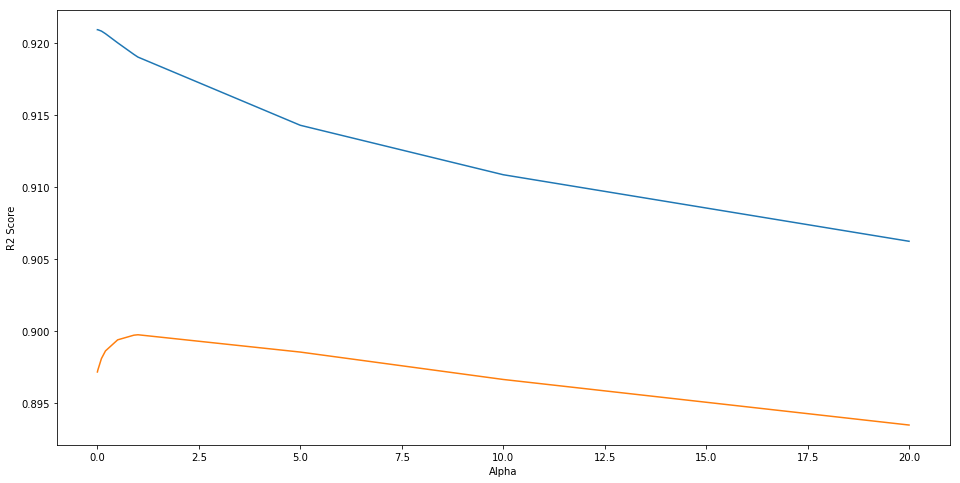

In [94]:
# Plot the R2 and Alpha value 
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [95]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 1.0}

In [96]:
# The Best alpha value is 1.0 for ridge.we have got.

In [120]:
# Check the R2 value:
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9178432571811125
0.8714190657847071


In [121]:
# Let us check and model parameter coefficents value in the ascending order for ridge... top variables.
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure      Coef
63   Neighborhood_BrDale  0.513642
27          BedroomAbvGr  0.463850
70   Neighborhood_IDOTRR  0.439568
35            GarageQual  0.387540
64  Neighborhood_BrkSide  0.378785
31            Fireplaces  0.374099
26              HalfBath  0.326834
61      LotConfig_Inside  0.283482
55       LandContour_Low  0.259219
10              BsmtCond  0.255176

## 9. Conclusion of Ridge : 

We can see the top 10 variables to be focussed in Ridge with the optimial value is 1.0. Let us check in the Lasso as well and we decide it further.

## 10. Lasso Regression:

In [99]:
# Let us Check it in Lasso Regression:

lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9125729730697819
0.872477370310498


In [100]:
# Model Parameters X^3 
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))


[('MSSubClass', -1.162),
 ('LotArea', -0.108),
 ('LotShape', 0.175),
 ('LandSlope', 0.13),
 ('OverallQual', 0.149),
 ('OverallCond', 0.017),
 ('MasVnrArea', -0.0),
 ('ExterQual', 0.081),
 ('ExterCond', 0.0),
 ('BsmtQual', 0.004),
 ('BsmtCond', 0.43),
 ('BsmtExposure', -0.103),
 ('BsmtFinType1', 0.125),
 ('BsmtFinSF1', 0.091),
 ('BsmtFinType2', 0.111),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', 0.048),
 ('TotalBsmtSF', -0.005),
 ('CentralAir', 0.153),
 ('1stFlrSF', -0.0),
 ('2ndFlrSF', -0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', -0.106),
 ('BsmtFullBath', -0.154),
 ('BsmtHalfBath', -0.117),
 ('FullBath', -0.115),
 ('HalfBath', 0.301),
 ('BedroomAbvGr', 0.431),
 ('KitchenAbvGr', -0.156),
 ('KitchenQual', -0.064),
 ('TotRmsAbvGrd', -0.079),
 ('Fireplaces', 0.328),
 ('GarageFinish', 0.068),
 ('GarageCars', 0.0),
 ('GarageArea', 0.0),
 ('GarageQual', 0.201),
 ('GarageCond', 0.0),
 ('WoodDeckSF', -0.0),
 ('OpenPorchSF', 0.151),
 ('EnclosedPorch', 0.148),
 ('3SsnPorch', -0.0),
 ('ScreenPorch', -

In [101]:
# K fold Gridsearch with 5 folds
folds = KFold(n_splits=5,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [102]:
# Check the retalted aplha value r^2 across the 3 degrees.
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.014044      0.001796         0.001128        0.000211        0.001   
1       0.003124      0.000241         0.000807        0.000130        0.010   
2       0.002633      0.000534         0.000876        0.000127        0.100   
3       0.002375      0.000305         0.001043        0.000217        1.000   
4       0.002111      0.000270         0.000805        0.000082        5.000   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}           0.917677           0.899363           0.868812   
1   {'alpha': 0.01}           0.903768           0.874591           0.858181   
2    {'alpha': 0.1}           0.852829           0.784595           0.813355   
3    {'alpha': 1.0}          -0.000831          -0.010124          -0.015310   
4    {'alpha': 5.0}          -0.000831          -0.010124          -0.015310   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.921244  ...         0.898782        0.019526                1   
1           0.894693  ...         0.880104        0.016752                2   
2           0.822241  ...         0.815836        0.022310                3   
3          -0.016097  ...        -0.010428        0.005454                4   
4          -0.016097  ...        -0.010428        0.005454                4   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.909719            0.913144            0.919383   
1            0.886521            0.889318            0.897092   
2            0.814471            0.823094            0.825857   
3            0.000000            0.000000            0.000000   
4            0.000000            0.000000            0.000000   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.909516            0.918875          0.914127         0.004286  
1            0.884606            0.892639          0.890035         0.004448  
2            0.820489            0.827160          0.822214         0.004504  
3            0.000000            0.000000          0.000000         0.000000  
4            0.000000            0.000000          0.000000         0.000000  

[5 rows x 21 columns]

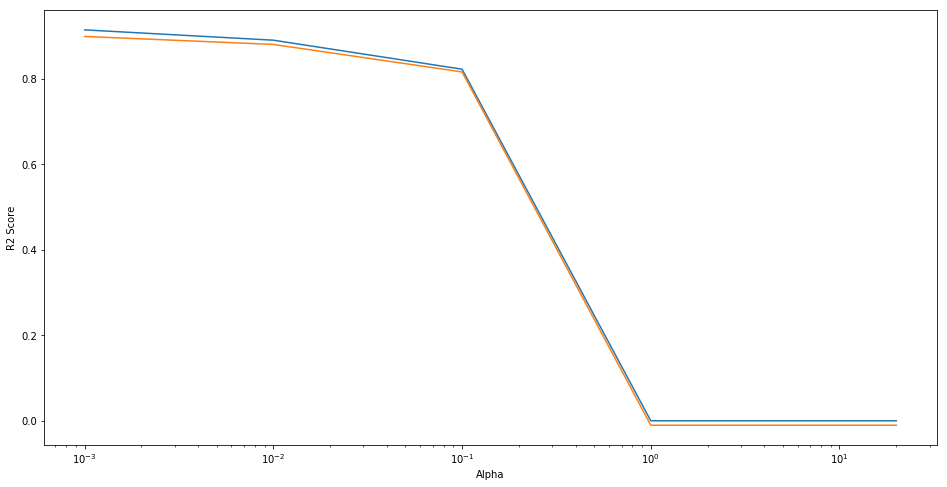

In [103]:
# Plot the R^2 Vs Alpha graph:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [104]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [122]:
# Check the R^2 back again.
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9080036066391924
0.8700406080128855


In [123]:
# Check the top variables
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Feature      Coef
10             BsmtCond  0.424393
70  Neighborhood_IDOTRR  0.403861
27         BedroomAbvGr  0.387847
26             HalfBath  0.248038
61     LotConfig_Inside  0.237714
31           Fireplaces  0.231263
2              LotShape  0.190357
4           OverallQual  0.154167
3             LandSlope  0.138591
12         BsmtFinType1  0.123033

## 11. Conclusion of Final Model:

## After creating model in both Ridge and Lasso we can see that the r2_scores are almost same for both of them but 
## as lasso will penalize more on the dataset and can also help in feature elimination so will consider the lasso as my final model. 

In [107]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9125729730697819
0.872477370310498


In [108]:
#After compairing both the model we can see that the below Features are best explaining the DataSet

# 1. BedroomAbvGr -  Bedrooms above grade (does NOT include basement bedrooms and bathrooms)
# 2. Neighborhood_IDOTRR - Physical locations within Ames city limits - Iowa DOT and Rail Road
# 3. Fireplaces -Number of fireplaces
# 4. HalfBath - Half baths above grade
# 5. BsmtCond - Evaluates the general condition of the basement

## Best Alpha for Ridge is - 1.0 and Best Alpha for Lasso is 0.001


In [128]:
# Top 10 variables which was having the major impact on the sale price.
lasso_coef.sort_values(by='Coef',ascending=False)

Feature      Coef
10              BsmtCond  0.424393
70   Neighborhood_IDOTRR  0.403861
27          BedroomAbvGr  0.387847
26              HalfBath  0.248038
61      LotConfig_Inside  0.237714
31            Fireplaces  0.231263
2               LotShape  0.190357
4            OverallQual  0.154167
3              LandSlope  0.138591
12          BsmtFinType1  0.123033
18            CentralAir  0.118814
69  Neighborhood_Gilbert  0.102770
39         EnclosedPorch  0.093968
54       LandContour_HLS  0.092973
13            BsmtFinSF1  0.086363
7              ExterQual  0.076051
38           OpenPorchSF  0.070312
32          GarageFinish  0.068150
42              PoolArea  0.051245
35            GarageQual  0.034172
55       LandContour_Low  0.033391
14          BsmtFinType2  0.020684
5            OverallCond  0.014761
8              ExterCond  0.007771
20              2ndFlrSF -0.000000
58     LotConfig_CulDSac -0.000000
48            YrSold_Old -0.000000
49           MSZoning_FV -0.000000
51           MSZoning_RL -0.000000
52           MSZoning_RM -0.000000
..                   ...       ...
66  Neighborhood_CollgCr -0.000000
67  Neighborhood_Crawfor -0.000000
68  Neighborhood_Edwards -0.000000
47       GarageYrBlt_Old -0.000000
45         YearBuilt_Old -0.000000
21          LowQualFinSF -0.000000
36            GarageCond -0.000000
19              1stFlrSF -0.000000
29           KitchenQual -0.000000
16             BsmtUnfSF  0.000000
15            BsmtFinSF2 -0.000000
44                MoSold  0.000000
34            GarageArea  0.000000
33            GarageCars  0.000000
37            WoodDeckSF -0.000000
40             3SsnPorch -0.000000
41           ScreenPorch -0.000000
9               BsmtQual  0.000000
43               MiscVal  0.000000
50           MSZoning_RH -0.045650
22             GrLivArea -0.060072
30          TotRmsAbvGrd -0.069836
23          BsmtFullBath -0.079587
17           TotalBsmtSF -0.083134
1                LotArea -0.088308
24          BsmtHalfBath -0.092199
25              FullBath -0.093635
11          BsmtExposure -0.096904
28          KitchenAbvGr -0.098461
0             MSSubClass -1.070376

[71 rows x 2 columns]